# 1. 강의영상 

{{<video https://youtu.be/playlist?list=PLQqh36zP38-xzU9SK7N9KSAMxLVLTqtTu&si=OFhnv1gcYHsJ1c9F >}}

# 2. Imports 

In [50]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn.linear_model
import sklearn.preprocessing

# 3. 선형모형의 적 

## A. 결측치의 존재 

`-` 문제: 데이터에서 누락된 값이 있는 경우, 선형모델이 돌아가지 않음. ("`NaN이 있어서 모형을 적합할 수 없습니다`"라는 에러 발생)

`-` 해결방법 

- 방법1: 결측치를 제거
    1. 결측치가 포함된 열을 제거
    2. 결측치가 포함된 행을 제거 
    3. 위의 두 방법을 혼합
- 방법2: 결측치를 impute 
    1. train 에서는 fit_transform, test 에서는 transform
    2. train, test에서 모두 fit_transform
    3. 임의의 값 (예를들면 -999)로 일괄 impute
    4. interploation (이미지나 시계열 자료)

## B. 다중공선성의 존재

`-` 문제: 데이터의 설명변수가 역할이 겹칠경우 선형모형의 일반화 성능이 좋지 않음. 

`-` 해결방법

- 방법1: 변수제거 
    1. X의 corr을 파악하고 (혹은 히트맵을 그리고) 느낌적으로 제거
    2. PCA등 차원축소기법을 이용한 제거 
- 방법2: 공선성을 가지는 변수를 모아 새로운 변수로 변환
    1. 느낌적으로 변환 (예시 Fsize = Sibsp + Parch + 1, 이후 Sibsp, Parch 는 drop) 
    2. PCA를 이용한 변환 
- 방법3: Ridge, Lasso 등 패널티계열을 사용 
    1. Rigde
    2. Lasso
    3. Elastic net

`-` 방법1-1 (X의 corr을 파악하고 느낌적으로 제거) 의 예시 

In [53]:
df = pd.read_csv("https://raw.githubusercontent.com/guebin/MP2023/main/posts/employment_multicollinearity.csv")
X = df.loc[:,'gpa':'toeic2']
X

,gpa,toeic,toeic0,toeic1,toeic2
0,0.051535,135,129.566309,133.078481,121.678398
1,0.355496,935,940.563187,935.723570,939.190519
2,2.228435,485,493.671390,493.909118,475.500970
3,1.179701,65,62.272565,55.957257,68.521468
4,3.962356,445,449.280637,438.895582,433.598274
...,...,...,...,...,...
495,4.288465,280,276.680902,274.502675,277.868536
496,2.601212,310,296.940263,301.545000,306.725610
497,0.042323,225,206.793217,228.335345,222.115146
498,1.041416,320,327.461442,323.019899,329.589337


*corr 조사*

In [55]:
X.corr()

,gpa,toeic,toeic0,toeic1,toeic2
gpa,1.000000,-0.033983,-0.035722,-0.037734,-0.034828
toeic,-0.033983,1.000000,0.999435,0.999322,0.999341
toeic0,-0.035722,0.999435,1.000000,0.998746,0.998828
toeic1,-0.037734,0.999322,0.998746,1.000000,0.998721
toeic2,-0.034828,0.999341,0.998828,0.998721,1.000000


*heatmap 플랏*

<Axes: >

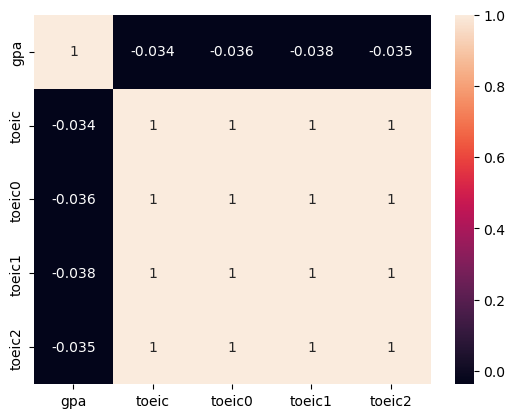

In [57]:
sns.heatmap(X.corr(),annot=True)

## C. 관련이 없는 변수의 존재 

`-` 문제: 데이터에서 불필요한 설명변수가 너무 많을 경우 선형모형의 일반화 성능이 좋지 않음. 

- 불필요한 설명변수임의 쉬운 예시: 고객이름, ID, Index 관련 변수 

`-` 해결방법

- 방법1: 변수제거 
    1. (y,X)의 corr을 파악하고 (혹은 히트맵을 그리고) 느낌적으로 제거 
    2. PCA를 이용한 제거 
    3. Lasso를 이용한 제거 
- 방법2: 더 많은 데이터를 확보 (궁극기술, 그런데 차원의 저주때문에 힘듬)

`-` 방법1-1의 예시 

In [59]:
np.random.seed(1)
df = pd.read_csv('https://raw.githubusercontent.com/guebin/MP2023/main/posts/employment.csv')
df_balance = pd.DataFrame((np.random.randn(500,3)).reshape(500,3)*1,columns = ['balance'+str(i) for i in range(3)])
df_train = pd.concat([df,df_balance],axis=1)
df_train

,toeic,gpa,employment,balance0,balance1,balance2
0,135,0.051535,0,1.624345,-0.611756,-0.528172
1,935,0.355496,0,-1.072969,0.865408,-2.301539
2,485,2.228435,0,1.744812,-0.761207,0.319039
3,65,1.179701,0,-0.249370,1.462108,-2.060141
4,445,3.962356,1,-0.322417,-0.384054,1.133769
...,...,...,...,...,...,...
495,280,4.288465,1,-1.326490,0.308204,1.115489
496,310,2.601212,1,1.008196,-3.016032,-1.619646
497,225,0.042323,0,2.005141,-0.187626,-0.148941
498,320,1.041416,0,1.165335,0.196645,-0.632590


In [61]:
df_train.corr()

,toeic,gpa,employment,balance0,balance1,balance2
toeic,1.000000,-0.033983,0.260183,0.002682,0.110530,0.024664
gpa,-0.033983,1.000000,0.711022,-0.025197,0.005272,0.020794
employment,0.260183,0.711022,1.000000,-0.007348,0.036706,0.032284
balance0,0.002682,-0.025197,-0.007348,1.000000,-0.059167,0.040035
balance1,0.110530,0.005272,0.036706,-0.059167,1.000000,-0.030215
balance2,0.024664,0.020794,0.032284,0.040035,-0.030215,1.000000


<Axes: >

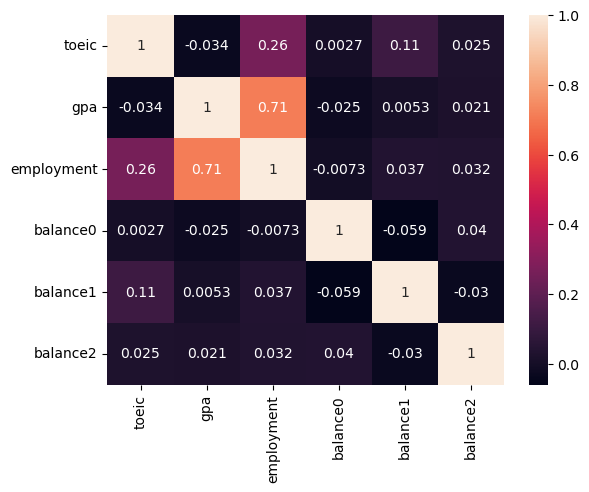

In [63]:
sns.heatmap(df_train.corr(),annot=True)

1. 설명변수 balance0,1,2(=X3,X4,X5)는 반응변수 employment(=y)와 관련이 없어 -> X3,X4,X5는 제외하자. 
2. 반응변수 employment(=y)와 관련이 있는 설명변수인 toiec,gpa (=X1,X2)는 남기자. 
3. 공선성체크: 설명변수 toeic, gpa (=X1,X2)의 corr은 -0.034 로 높지 않으니 다중공선성문제를 걱정할 필요가 없음. 

`-` 방법1-3의 예시 

In [66]:
np.random.seed(1)
df = pd.read_csv('https://raw.githubusercontent.com/guebin/MP2023/main/posts/employment.csv')
df_balance = pd.DataFrame((np.random.randn(500,3)).reshape(500,3)*1,columns = ['balance'+str(i) for i in range(3)])
df_train = pd.concat([df,df_balance],axis=1)
df_train

,toeic,gpa,employment,balance0,balance1,balance2
0,135,0.051535,0,1.624345,-0.611756,-0.528172
1,935,0.355496,0,-1.072969,0.865408,-2.301539
2,485,2.228435,0,1.744812,-0.761207,0.319039
3,65,1.179701,0,-0.249370,1.462108,-2.060141
4,445,3.962356,1,-0.322417,-0.384054,1.133769
...,...,...,...,...,...,...
495,280,4.288465,1,-1.326490,0.308204,1.115489
496,310,2.601212,1,1.008196,-3.016032,-1.619646
497,225,0.042323,0,2.005141,-0.187626,-0.148941
498,320,1.041416,0,1.165335,0.196645,-0.632590


In [86]:
# step1
X,y = df_train[['toeic','gpa','balance0','balance1','balance2']], df_train['employment']
# step2 
predictr = sklearn.linear_model.LogisticRegressionCV(
    Cs = [0.1, 1, 10, 100],
    penalty='l1',
    solver='liblinear',
    random_state=42
)
# step3 
predictr.fit(X,y)
# step4 -- pass

LogisticRegressionCV(Cs=[0.1, 1, 10, 100], penalty='l1', random_state=42,
                     solver='liblinear')

In [87]:
predictr.coef_

array([[0.00260249, 1.41401358, 0.        , 0.        , 0.        ]])

In [88]:
s = pd.Series(predictr.coef_.reshape(-1))
s.index= X.columns
s

toeic       0.002602
gpa         1.414014
balance0    0.000000
balance1    0.000000
balance2    0.000000
dtype: float64

## D. 이상치의 존재 

`-` 문제: 이상치가 존재할 경우 전체 모형이 무너질 수 있음 

`-` 이상치가 있을 경우 해결할 수 있는 방법 

- 방법1: 이상치를 제거하고 분석한다. 
    1. 느낌적으로 제거함. 
    2. 이상치를 감지하는 지표을 사용하여 제거한 이후 분석 
    3. 이상치를 자동으로 감지하는 모형을 사용하여 이상치를 제거한 이후 분석
- 방법2: 로버스트 선형회귀 계열을 이용
    1. `sklearn.linear_model.HuberRegressor` 등     
- 방법3: 이상치를 완화시키는 변환을 사용 
    1. `sklearn.preprocessing.PowerTransformer` 이용 

`-` 방법3-1의 예시 

In [89]:
np.random.seed(43052)
temp = pd.read_csv('https://raw.githubusercontent.com/guebin/DV2022/master/posts/temp.csv').iloc[:100,3].to_numpy()
temp.sort()
ice_sales = 10 + temp * 0.5 + np.random.randn(100)
ice_sales[0] = 50
df_train = pd.DataFrame({'temp':temp,'ice_sales':ice_sales})[:10]
df_train

,temp,ice_sales
0,-4.1,50.000000
1,-3.7,9.234175
2,-3.0,9.642778
3,-1.3,9.657894
4,-0.5,9.987787
5,-0.3,10.205951
6,0.3,8.486925
7,0.4,8.817227
8,0.4,8.273155
9,0.7,8.863784


In [95]:
transformr = sklearn.preprocessing.PowerTransformer()
x,y = transformr.fit_transform(df_train).T

<Axes: xlabel='temp', ylabel='ice_sales'>

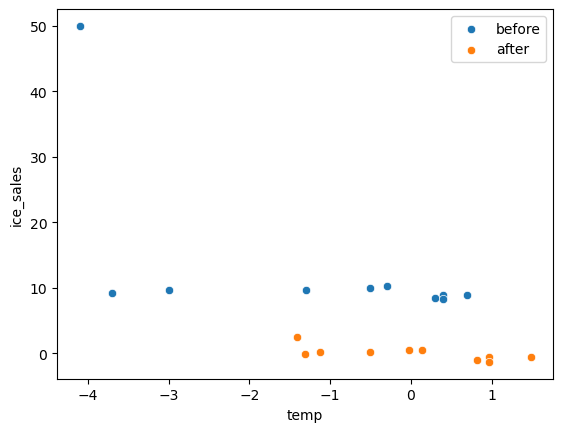

In [99]:
sns.scatterplot(df_train,x='temp',y='ice_sales',label='before')
sns.scatterplot(x=x,y=y,label='after')

---참고---

`PowerTransformer()`는 자료가 정규분포가 아닌 경우 강제로 정규화하는 변환이다. 

In [104]:
x = np.random.exponential(scale=10, size=1000)
transformr = sklearn.preprocessing.PowerTransformer(method='box-cox')  # 'box-cox' 또는 'yeo-johnson' 중 선택 가능, 디폴트는 이오존슨
y = transformr.fit_transform(x.reshape(-1, 1))

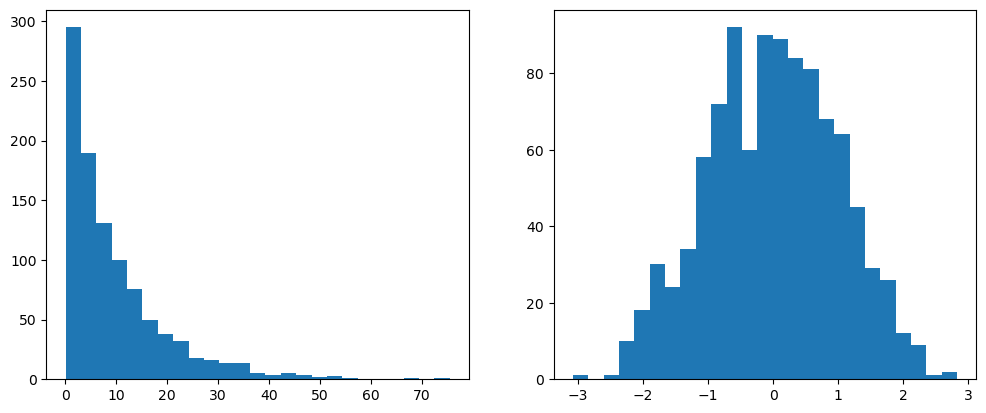

In [105]:
fig, ax = plt.subplots(1,2)
ax[0].hist(x,bins=25)
ax[1].hist(y,bins=25)
fig.set_figwidth(12)

## E. 교호작용의 존재 

`-` 문제: 설명 변수 간의 상호 작용이 있는 경우 이를 고려하지 않으면 모델이 데이터를 잘 설명하지 못할 수 있음. 

`-` 해결: 고려하면 됩니당.. 